<a href="https://colab.research.google.com/github/IbrahimKhan77/my_data/blob/main/Main_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
!pip install category_encoders



In [27]:
!git clone https://github.com/IbrahimKhan77/my_data.git

fatal: destination path 'my_data' already exists and is not an empty directory.


In [33]:
df = pd.read_excel("/content/my_data/Survey_Data.xlsx")
df

,Gender,Mode_of_study,Year_of_study,Home_wi-fi_access,home_desktop/laptop_access,solely_for_your_use?,Device_use_for_learning,Self_Digital_knowlwedge_and_skills_rating,Question 1,Question 2,...,Question 19,Question 20,Question 21,Question 22,Question 23,Question 24,Question 25,Question 26,Question 27,Question 28
0,Male,Full-time,3,Yes,No,NaN,3,6,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree
1,Male,Full-time,3,Yes,Yes,Yes,"3,2,1",8,Agree,Agree,...,Agree,Agree,Strongly agree,Agree,Agree,Neutral,Neutral,Neutral,Agree,Agree
2,Female,Full-time,3,Yes,Yes,Yes,4 1,4,Somewhat agree,Somewhat disagree,...,Neutral,Neutral,Disagree,Neutral,Neutral,Agree,Somewhat disagree,Agree,Somewhat disagree,Somewhat disagree
3,Male,Full-time,3,Yes,Yes,Yes,231,6,Somewhat agree,Agree,...,Somewhat agree,Neutral,Somewhat agree,Agree,Agree,Agree,Agree,Agree,Somewhat agree,Agree
4,Female,Full-time,3,Yes,Yes,Yes,"(3) ,(1), (2)",8,Neutral,Strongly disagree,...,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Somewhat agree,Somewhat agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Female,Full-time,3,Yes,Yes,Yes,3,4,Somewhat disagree,Somewhat disagree,...,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Agree,Agree,Somewhat agree,Neutral,Neutral,Somewhat agree
421,Male,Full-time,1,Yes,Yes,Yes,123,7,Somewhat disagree,Agree,...,Neutral,Somewhat disagree,Agree,Strongly agree,Strongly disagree,Neutral,Somewhat agree,Strongly disagree,Somewhat agree,Somewhat agree
422,Female,Full-time,3,Yes,Yes,Yes,"2, 1, 3",8,Somewhat agree,Somewhat agree,...,Somewhat disagree,Neutral,Agree,Somewhat agree,Agree,Disagree,Somewhat agree,Strongly disagree,Somewhat disagree,Disagree
423,Female,Full-time,1,Yes,Yes,No,3,6,Agree,Agree,...,Agree,Somewhat agree,Agree,Neutral,Disagree,Disagree,Neutral,Somewhat agree,Agree,Agree


In [ ]:
df['Question 28'].value_counts(normalize=True)

Neutral              0.235294
Somewhat agree       0.200000
Agree                0.190588
Somewhat disagree    0.141176
Strongly disagree    0.101176
Disagree             0.084706
Strongly agree       0.047059
Name: Question 28, dtype: float64

By above , we could say that 23% students are neautral and 43% agree, rest disagree


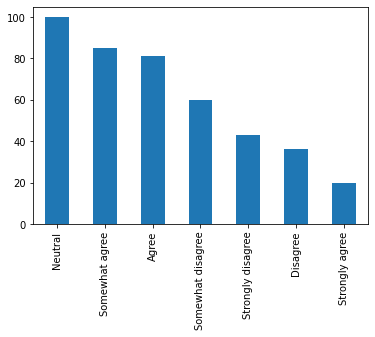

In [ ]:
df['Question 28'].value_counts().plot(kind="bar")

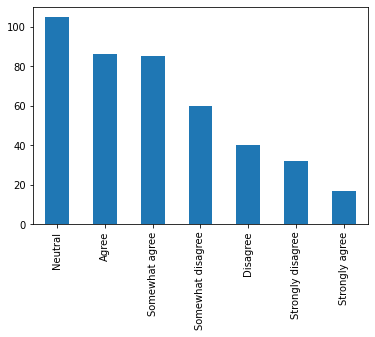

In [ ]:
df['Question 27'].value_counts().plot(kind="bar")

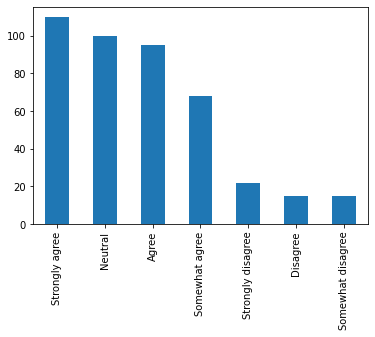

In [ ]:
df['Question 10'].value_counts().plot(kind="bar")

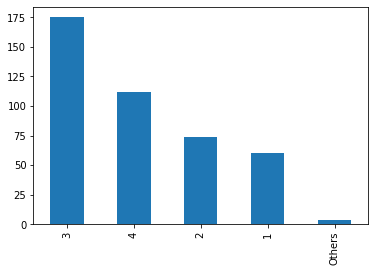

In [ ]:
df['Year_of_study'].value_counts().plot(kind="bar")

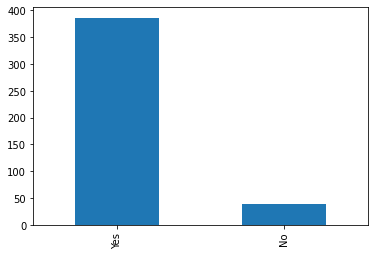

In [ ]:
df['Home_wi-fi_access '].value_counts().plot(kind="bar")

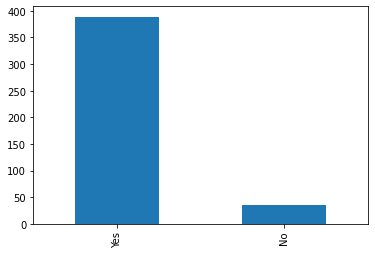

In [ ]:
df['home_desktop/laptop_access'].value_counts().plot(kind="bar")

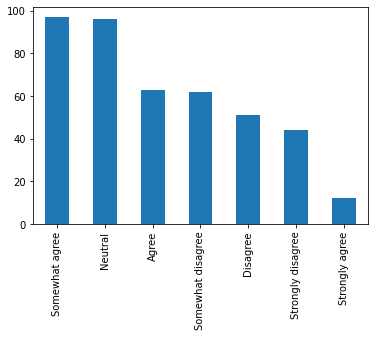

In [ ]:
df['Question 11'].value_counts().plot(kind="bar")

**Bi-variate Data-viz**

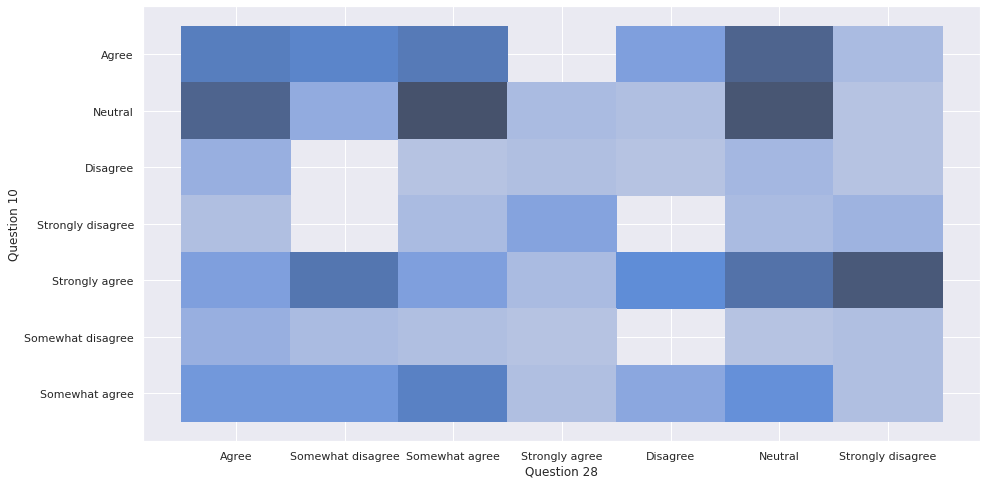

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(x='Question 28' , y='Question 10' , data=df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Gender                                     425 non-null    object
 1   Mode_of_study                              425 non-null    object
 2   Year_of_study                              425 non-null    object
 3   Home_wi-fi_access                          425 non-null    object
 4   home_desktop/laptop_access                 425 non-null    object
 5   solely_for_your_use?                       387 non-null    object
 6   Device_use_for_learning                    425 non-null    object
 7   Self_Digital_knowlwedge_and_skills_rating  425 non-null    int64 
 8   Question 1                                 425 non-null    object
 9   Question 2                                 425 non-null    object
 10  Question 3                            

We see that - 

1.   Categorical columns with Questions needs to be converted to Numerical
2.   Only one column "solely_for_your_use?" is having missing values and rest all the columns have complete values, therefore missing values needs to be imputed 


**1 - Converting Categorical column into Numerical using Ordinal Encoding (Scikit learn)**


In [45]:
satisfaction_dict = {'Strongly agree': 1,'Agree': 2,'Somewhat agree': 3,'Neutral': 4,"Somewhat disagree":5, 'Disagree': 6,"Strongly disagree":7}
satisfaction_dict

df["Question_1"] = df['Question 1'].map(satisfaction_dict)
df["Question_2"] = df['Question 2'].map(satisfaction_dict)
df["Question_3"] = df['Question 3'].map(satisfaction_dict)
df["Question_4"] = df['Question 4'].map(satisfaction_dict)
df["Question_5"] = df['Question 5'].map(satisfaction_dict)
df["Question_6"] = df['Question 6'].map(satisfaction_dict)
df["Question_7"] = df['Question 7'].map(satisfaction_dict)
df["Question_8"] = df['Question 8'].map(satisfaction_dict)
df["Question_9"] = df['Question 9'].map(satisfaction_dict)
df["Question_10"] = df['Question 10'].map(satisfaction_dict)
df["Question_11"] = df['Question 11'].map(satisfaction_dict)
df["Question_12"] = df['Question 12'].map(satisfaction_dict)
df["Question_13"] = df['Question 13'].map(satisfaction_dict)
df["Question_14"] = df['Question 14'].map(satisfaction_dict)
df["Question_15"] = df['Question 15'].map(satisfaction_dict)
df["Question_16"] = df['Question 16'].map(satisfaction_dict)
df["Question_17"] = df['Question 17'].map(satisfaction_dict)
df["Question_18"] = df['Question 18'].map(satisfaction_dict)
df["Question_19"] = df['Question 19'].map(satisfaction_dict)
df["Question_20"] = df['Question 20'].map(satisfaction_dict)
df["Question_21"] = df['Question 21'].map(satisfaction_dict)
df["Question_22"] = df['Question 22'].map(satisfaction_dict)
df["Question_23"] = df['Question 23'].map(satisfaction_dict)
df["Question_24"] = df['Question 24'].map(satisfaction_dict)
df["Question_25"] = df['Question 25'].map(satisfaction_dict)
df["Question_26"] = df['Question 26'].map(satisfaction_dict)
df["Question_27"] = df['Question 27'].map(satisfaction_dict)

**2 - Checking unique values in the column having missing values and imputing them with the Mode**

In [46]:
df['solely_for_your_use?'].value_counts(normalize=True)

Yes    0.803618
No     0.196382
Name: solely_for_your_use?, dtype: float64

In [47]:
most_frequent_category = df["solely_for_your_use?"].mode()[0]
    
df["solely_for_your_use?_Imp"] = df["solely_for_your_use?"]
df["solely_for_your_use?_Imp"].fillna(most_frequent_category, inplace=True)

**Displaying the dataset again after the changes**

In [49]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 64 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Gender                                     425 non-null    object
 1   Mode_of_study                              425 non-null    object
 2   Year_of_study                              425 non-null    object
 3   Home_wi-fi_access                          425 non-null    object
 4   home_desktop/laptop_access                 425 non-null    object
 5   solely_for_your_use?                       387 non-null    object
 6   Device_use_for_learning                    425 non-null    object
 7   Self_Digital_knowlwedge_and_skills_rating  425 non-null    int64 
 8   Question 1                                 425 non-null    object
 9   Question 2                                 425 non-null    object
 10  Question 3                            

,Gender,Mode_of_study,Year_of_study,Home_wi-fi_access,home_desktop/laptop_access,solely_for_your_use?,Device_use_for_learning,Self_Digital_knowlwedge_and_skills_rating,Question 1,Question 2,...,Question_19,Question_20,Question_21,Question_22,Question_23,Question_24,Question_25,Question_26,Question_27,solely_for_your_use?_Imp
0,Male,Full-time,3,Yes,No,NaN,3,6,Agree,Agree,...,2,2,2,2,2,2,2,2,2,Yes
1,Male,Full-time,3,Yes,Yes,Yes,"3,2,1",8,Agree,Agree,...,2,2,1,2,2,4,4,4,2,Yes
2,Female,Full-time,3,Yes,Yes,Yes,4 1,4,Somewhat agree,Somewhat disagree,...,4,4,6,4,4,2,5,2,5,Yes
3,Male,Full-time,3,Yes,Yes,Yes,231,6,Somewhat agree,Agree,...,3,4,3,2,2,2,2,2,3,Yes
4,Female,Full-time,3,Yes,Yes,Yes,"(3) ,(1), (2)",8,Neutral,Strongly disagree,...,2,2,1,1,1,3,2,1,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Female,Full-time,3,Yes,Yes,Yes,3,4,Somewhat disagree,Somewhat disagree,...,3,5,3,5,2,2,3,4,4,Yes
421,Male,Full-time,1,Yes,Yes,Yes,123,7,Somewhat disagree,Agree,...,4,5,2,1,7,4,3,7,3,Yes
422,Female,Full-time,3,Yes,Yes,Yes,"2, 1, 3",8,Somewhat agree,Somewhat agree,...,5,4,2,3,2,6,3,7,5,Yes
423,Female,Full-time,1,Yes,Yes,No,3,6,Agree,Agree,...,2,3,2,4,6,6,4,3,2,No


Now both the issues have been resolved

In [41]:
df['solely_for_your_use?_Imp'].value_counts(normalize=True)

Yes    0.821176
No     0.178824
Name: solely_for_your_use?_Imp, dtype: float64

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=6, random_state=1)
from sklearn.model_selection import cross_val_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
n_scores = cross_val_score(model, X, y, scoring='accuracy', n_jobs=-1)



NameError: ignored

**Regression Analysis**

In [ ]:
reg = LinearRegression()
X = df.values[:,35]
Y = df.values[:,-1]

model = reg.fit(X,Y)
model.summary()

ValueError: ignored